## 머신러닝 기본 설정

In [1]:
# 기본적인 패키지부터 추가
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as super
import folium
import re

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from datetime import datetime
import time

In [29]:
font_path = 'C:/windows/fonts/NanumBarunpenB.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [30]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

!pip install pmdarima

In [31]:
oil_price = pd.read_csv('./data/유가전처리.csv', encoding='utf-8', sep=',')
oil_price.head()

,일자,원유,휘발유,경유
0,2022-02-14,697.6,1681.6,1513.2
1,2022-02-15,685.0,1686.4,1517.1
2,2022-02-16,689.4,1692.5,1522.9
3,2022-02-17,683.3,1697.0,1529.0
4,2022-02-18,683.6,1699.5,1532.2


#### 시계열 예측 ARIMA
##### 휘발유 값 예측하기

In [32]:
oil_price['일자'] = pd.to_datetime(oil_price['일자'], format='%Y-%m-%d')

In [33]:
gasolin_price = oil_price[['일자', '휘발유']]
gasolin_price

,일자,휘발유
0,2022-02-14,1681.6
1,2022-02-15,1686.4
2,2022-02-16,1692.5
3,2022-02-17,1697.0
4,2022-02-18,1699.5
...,...,...
172,2022-08-05,1831.1
173,2022-08-06,1825.3
174,2022-08-07,1823.2
175,2022-08-08,1813.1


In [34]:
gasolin_price.set_index('일자', inplace=True)
gasolin_price

,휘발유
일자,
2022-02-14,1681.6
2022-02-15,1686.4
2022-02-16,1692.5
2022-02-17,1697.0
2022-02-18,1699.5
...,...
2022-08-05,1831.1
2022-08-06,1825.3
2022-08-07,1823.2


In [35]:
gasolin_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 177 entries, 2022-02-14 to 2022-08-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   휘발유     177 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


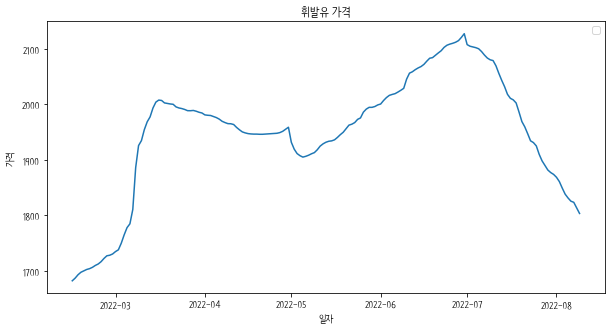

In [36]:
plt.figure(figsize=(10,5))
plt.plot(gasolin_price)
plt.xlabel('일자')
plt.ylabel('가격')
plt.title('휘발유 가격')
plt.legend()
plt.show()

In [37]:
gasolin_price.index[-1]

Timestamp('2022-08-09 00:00:00')

In [38]:
# 9일 값 예측 날짜 인덱스 df 만들기
index_9_days = pd.date_range(gasolin_price.index[-1], freq='D', periods=9, tz=None)
index_9_days

DatetimeIndex(['2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12',
               '2022-08-13', '2022-08-14', '2022-08-15', '2022-08-16',
               '2022-08-17'],
              dtype='datetime64[ns]', freq='D')

In [39]:
cur_oil_price = pd.read_csv('./data/과거_판매가격(주유소)20220810-20220817.csv', encoding='cp949')
cur_oil_price.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,기준 : 일간(20220810~20220817),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220810.0,S-OIL,셀프,0.0,1778.0,1878.0,0.0
2,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220811.0,S-OIL,셀프,0.0,1778.0,1878.0,0.0
3,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220812.0,S-OIL,셀프,0.0,1778.0,1878.0,0.0
4,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220813.0,S-OIL,셀프,0.0,1758.0,1858.0,0.0


In [40]:
cur_oil_price['기간'] = pd.to_datetime(cur_oil_price['기간'], format='%Y%m%d')
cur_oil_price.rename(columns={'기간' : '일자'}, inplace=True)
cur_oil_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   번호      3063 non-null   object        
 1   지역      3062 non-null   object        
 2   상호      3062 non-null   object        
 3   주소      3062 non-null   object        
 4   일자      3062 non-null   datetime64[ns]
 5   상표      3062 non-null   object        
 6   셀프여부    3062 non-null   object        
 7   고급휘발유   3062 non-null   float64       
 8   휘발유     3062 non-null   float64       
 9   경유      3062 non-null   float64       
 10  실내등유    3062 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 263.4+ KB


In [41]:
cur1_oil_price = cur_oil_price.groupby(["일자"])['휘발유'].mean().round().to_frame()
cur1_oil_price = cur1_oil_price.rename(columns={'휘발유':'실제 휘발유값'})
cur1_oil_price

,실제 휘발유값
일자,
2022-08-10,1788.0
2022-08-11,1777.0
2022-08-12,1770.0
2022-08-13,1762.0
2022-08-14,1760.0
2022-08-15,1755.0
2022-08-16,1749.0
2022-08-17,1739.0


<AxesSubplot:title={'center':'휘발유가격 예측'}, xlabel='일자', ylabel='휘발유'>

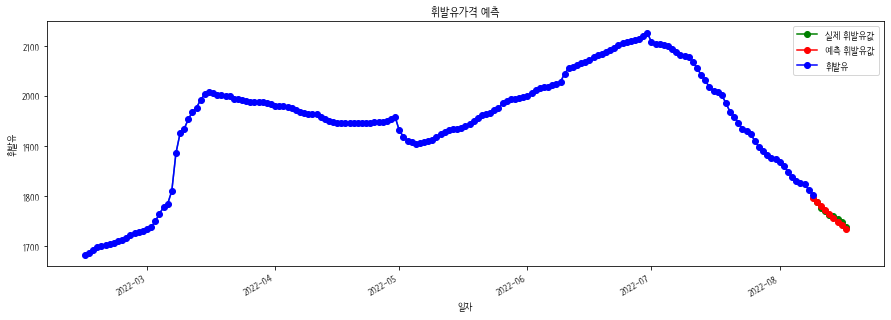

In [61]:
# Auto-ARIMA 돌리기 - 계측값이 일별이면 m=1, 월별이면 m=12, 주별이면 m=52, 
# 계절성이 있는 데이터면 seasonal=True 로 바꿔야함. 알아서 d 값을 찾아줌.
auto_arima_model = pm.auto_arima(gasolin_price, seasonal=False, m=1)

# 모델 예측
fcast2 = auto_arima_model.predict(9) 
fcast2 = pd.Series(fcast2, index=index_9_days)
fcast2 = fcast2.rename("예측 휘발유값")

# 예측값 시각화
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='일자', y='휘발유', data = gasolin_price)
chart.set_title('휘발유가격 예측')
cur1_oil_price.plot(ax=ax, color='green', marker="o", legend=True)
fcast2.plot(ax=ax, color='red', marker="o", legend=True)
gasolin_price.plot(ax=ax, color='blue', marker="o", legend=True)

In [43]:
prd1_oil_price = pd.DataFrame(fcast2)
prd1_oil_price

,예측 휘발유값
2022-08-09,1795.719734
2022-08-10,1787.932412
2022-08-11,1780.145090
2022-08-12,1772.357769
2022-08-13,1764.570447
2022-08-14,1756.783126
2022-08-15,1748.995804
2022-08-16,1741.208482
2022-08-17,1733.421161


In [44]:
pd.merge(cur1_oil_price, prd1_oil_price, how='inner', left_index=True, right_index=True)

,실제 휘발유값,예측 휘발유값
2022-08-10,1788.0,1787.932412
2022-08-11,1777.0,1780.145090
2022-08-12,1770.0,1772.357769
2022-08-13,1762.0,1764.570447
2022-08-14,1760.0,1756.783126
2022-08-15,1755.0,1748.995804
2022-08-16,1749.0,1741.208482
2022-08-17,1739.0,1733.421161


#### 경유 값 예측하기

In [45]:
disel_price = oil_price[['일자', '경유']]
disel_price

,일자,경유
0,2022-02-14,1513.2
1,2022-02-15,1517.1
2,2022-02-16,1522.9
3,2022-02-17,1529.0
4,2022-02-18,1532.2
...,...,...
172,2022-08-05,1923.1
173,2022-08-06,1917.6
174,2022-08-07,1915.7
175,2022-08-08,1905.8


In [46]:
disel_price.set_index('일자', inplace=True)
disel_price

,경유
일자,
2022-02-14,1513.2
2022-02-15,1517.1
2022-02-16,1522.9
2022-02-17,1529.0
2022-02-18,1532.2
...,...
2022-08-05,1923.1
2022-08-06,1917.6
2022-08-07,1915.7


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


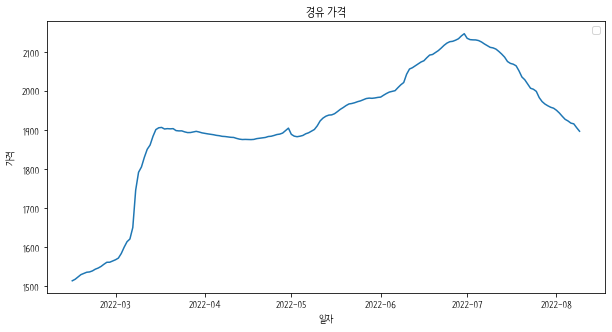

In [47]:
plt.figure(figsize=(10,5))
plt.plot(disel_price)
plt.xlabel('일자')
plt.ylabel('가격')
plt.title('경유 가격')
plt.legend()
plt.show()

In [48]:
disel_price.index[-1]

Timestamp('2022-08-09 00:00:00')

In [49]:
# 9일 값 예측 날짜 인덱스 df 만들기
index_9_days = pd.date_range(disel_price.index[-1], freq='D', periods=9, tz=None)
index_9_days

DatetimeIndex(['2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12',
               '2022-08-13', '2022-08-14', '2022-08-15', '2022-08-16',
               '2022-08-17'],
              dtype='datetime64[ns]', freq='D')

In [50]:
cur2_oil_price = cur_oil_price.groupby(["일자"])['경유'].mean().round().to_frame()
cur2_oil_price = cur2_oil_price.rename(columns={'경유' : '실제 경유값'})
cur2_oil_price

,실제 경유값
일자,
2022-08-10,1887.0
2022-08-11,1878.0
2022-08-12,1870.0
2022-08-13,1865.0
2022-08-14,1862.0
2022-08-15,1858.0
2022-08-16,1852.0
2022-08-17,1841.0


<AxesSubplot:title={'center':'경유가격 예측'}, xlabel='일자', ylabel='경유'>

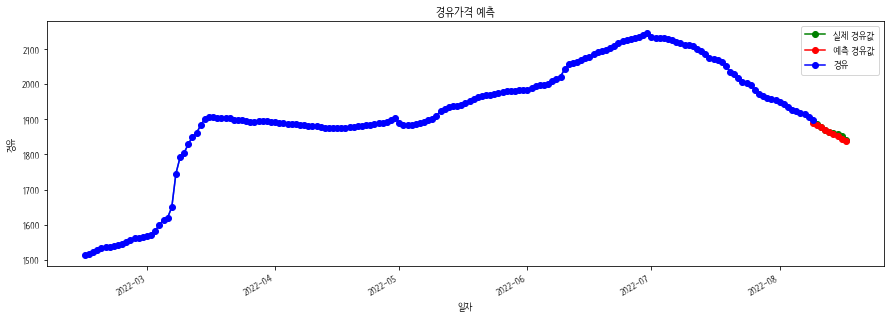

In [62]:
# Auto-ARIMA 돌리기 - 계측값이 일별이면 m=1, 월별이면 m=12, 주별이면 m=52, 
# 계절성이 있는 데이터면 seasonal=True 로 바꿔야함. 알아서 d 값을 찾아줌.
from cProfile import label


auto_arima_model = pm.auto_arima(disel_price, seasonal=False, m=1)

# 모델 예측
fcast2 = auto_arima_model.predict(9) 
fcast2 = pd.Series(fcast2, index=index_9_days)
fcast2 = fcast2.rename('예측 경유값')

# 예측값 시각화
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='일자', y='경유', data = disel_price)
chart.set_title('경유가격 예측')
cur2_oil_price.plot(ax=ax, color='green', marker="o", legend=True)
fcast2.plot(ax=ax, color='red', marker="o", legend=True)
disel_price.plot(ax=ax, color='blue', marker="o", legend=True)

In [52]:
prd2_oil_price = pd.DataFrame(fcast2)
prd2_oil_price

,예측 경유값
2022-08-09,1890.832321
2022-08-10,1884.207087
2022-08-11,1877.581853
2022-08-12,1870.956620
2022-08-13,1864.331386
2022-08-14,1857.706152
2022-08-15,1851.080919
2022-08-16,1844.455685
2022-08-17,1837.830452


In [53]:
pd.merge(cur2_oil_price, prd2_oil_price, how='inner', left_index=True, right_index=True)

,실제 경유값,예측 경유값
2022-08-10,1887.0,1884.207087
2022-08-11,1878.0,1877.581853
2022-08-12,1870.0,1870.956620
2022-08-13,1865.0,1864.331386
2022-08-14,1862.0,1857.706152
2022-08-15,1858.0,1851.080919
2022-08-16,1852.0,1844.455685
2022-08-17,1841.0,1837.830452
